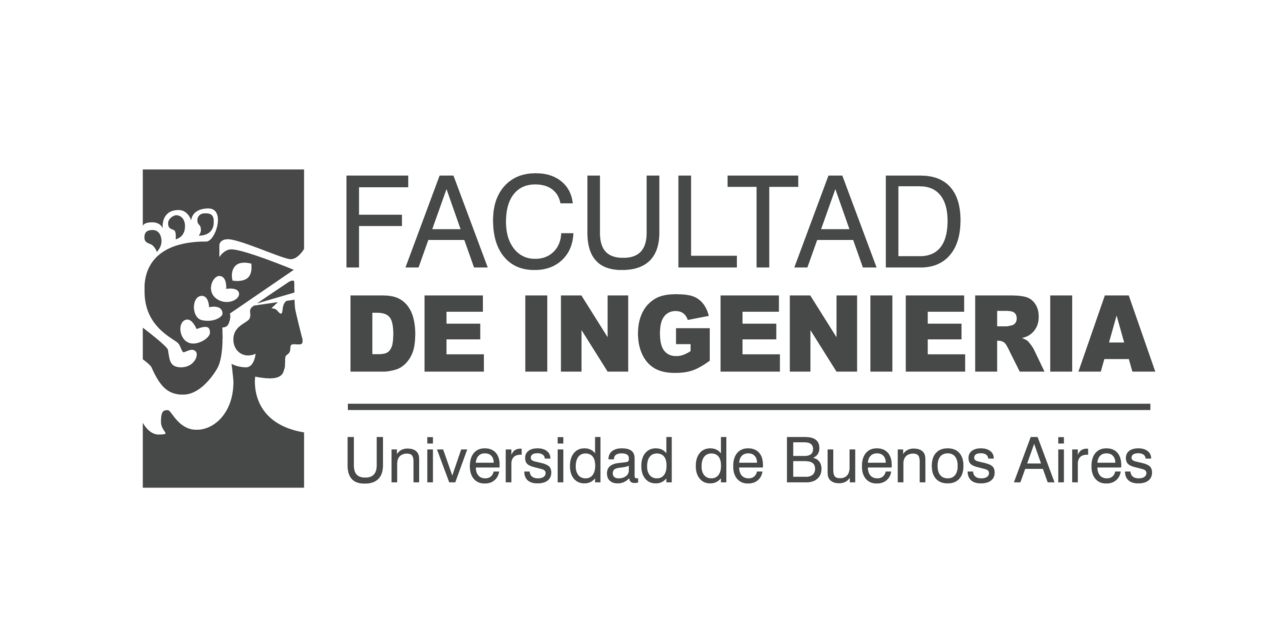

**Profesores:** <br />
Ing. Maxim Dorogov - mdorogov@fi.uba.ar <br />
Esp. Ing. Leandro Torrent - ingtorrentleandro@gmail.com <br />

**Alumnos:** <br />
Ing. Pablo Martin Gomez Verdini - gomezpablo86@gmail.com <br />
Ing. Diego Paciotti Iacchelli - diegopaciotti@gmail.com  <br />
Mg. Ing. Joaquin Gonzalez - joagonzalez@gmail.com <br />

**Repositorio Github**<br />
https://github.com/FIUBA-CEIA-18Co2024/VpC1-TP3 <br />

# TP 3: Enunciado

▪ Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en Material_TPs/TP3/images a partir del template Material_TPs/TP3/template
1. (4 puntos) Obtener una detección del logo en cada imagen sin falsos positivos
2. (4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la imagen coca_multi.png con el mismo témplate del ítem 1
3. (2 puntos) Generalizar el algoritmo del item 2 para todas las imágenes.

Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza de la detección.


## Imports

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Desarrollo del Trabajo Práctico

## Punto 1

In [2]:
def matching (img, template, params):    
# Hago una copia de la imagen porque ciclo a ciclo le dibujo rectángulos
    template_resized = cv.resize(template, (params[0], params[1]))
    if params[2]:
        template_resized = 255 - template_resized
    w, h = template_resized.shape[::-1]
    img_salida = img.copy()
    
    method = eval('cv.TM_CCOEFF_NORMED')
    
    # Aplicamos la coincidencia de patrones
    #--------------------------------------
    res = cv.matchTemplate(img[:, :, 2], template_resized, method) # Busco el canal rojo
    # Encontramos los valores máximos y mínimos
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    score = max_val
    top_left = max_loc
    # Marcamos el lugar donde lo haya encontrado
    #----------------------------------------
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img_salida,top_left, bottom_right, (0, 255, 0), 2)
    # Graficamos el procesamiento y la salida
    #----------------------------------------
    plt.figure()
    # Resultado de coincidencia
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    # Imagen original con recuadros
    plt.subplot(122),plt.imshow(img_salida)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.show()
    display(f"Score: {score}")

['data/images\\coca_logo_1.png', 'data/images\\coca_logo_2.png', 'data/images\\coca_multi.png', 'data/images\\coca_retro_1.png', 'data/images\\coca_retro_2.png', 'data/images\\logo_1.png']


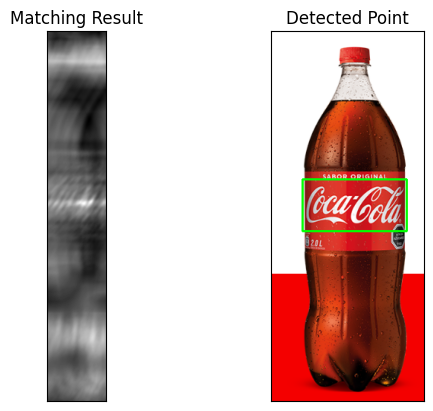

'Score: 0.3034612536430359'

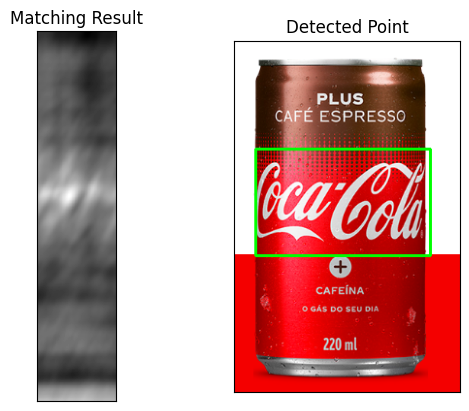

'Score: 0.2896941900253296'

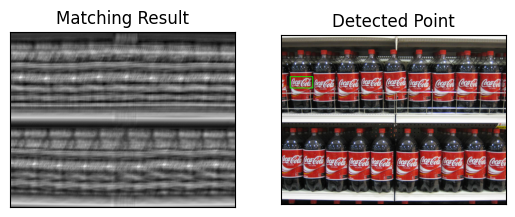

'Score: 0.5213674902915955'

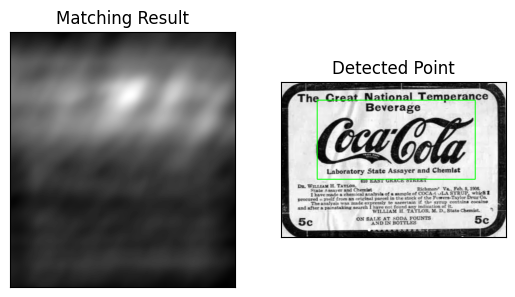

'Score: 0.4373584985733032'

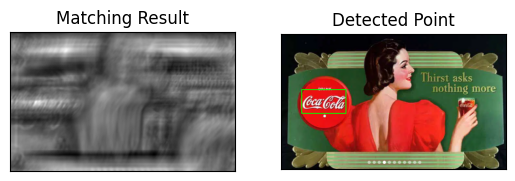

'Score: 0.4728694260120392'

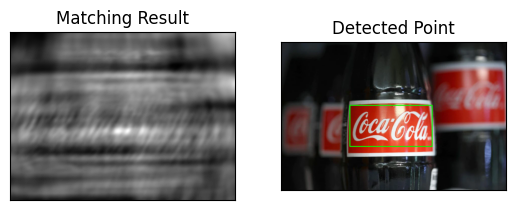

'Score: 0.375218003988266'

In [11]:
import os
import glob

def list_png_files(folder_path):
    # Use glob to find all .png files in the folder
    png_files = glob.glob(os.path.join(folder_path, "*.png"))
    return png_files

# Example usage
folder_path = "data/images"
png_files = list_png_files(folder_path)
print(png_files)

dict_template_size = {
    'data/images\\coca_logo_1.png' : [140, 70, 1],
    'data/images\\coca_logo_2.png': [180, 110, 1],
    'data/images\\coca_multi.png': [80, 40, 1],
    'data/images\\coca_retro_1.png': [500, 250, 0],
    'data/images\\coca_retro_2.png': [140, 75, 1],
    'data/images\\logo_1.png': [250, 125, 1]
}

template = cv.imread('data/template/pattern.png', cv.COLOR_BGR2RGB)
template = template[:, :, 0]

for file in png_files:
    img = cv.imread(file)
    img_rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
    matching (img_rgb, template, dict_template_size[file])
    

## Punto 2

1604
710
